#Malaria Disease Detection

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
! ls

gdrive	sample_data


In [3]:
%cd gdrive/My Drive/project_folder

/content/gdrive/My Drive/project_folder


In [4]:
! git clone https://github.com/anand170107032/Detecting-Malaria-using-Blood-Cell-Images.git

Cloning into 'Detecting-Malaria-using-Blood-Cell-Images'...
remote: Enumerating objects: 27572, done.
remote: Total 27572 (delta 0), reused 0 (delta 0), pack-reused 27572
Receiving objects: 100% (27572/27572), 345.93 MiB | 14.19 MiB/s, done.
Checking out files: 100% (27563/27563), done.


In [9]:
%cd 'Detecting-Malaria-using-Blood-Cell-Images'

/content/gdrive/My Drive/project_folder/Detecting-Malaria-using-Blood-Cell-Images


In [60]:
#importing important libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Dropout,Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [11]:
cwd = os.getcwd()

In [12]:
data_dir = cwd + '/cell_images'

In [13]:
os.listdir(data_dir)

['test', 'train']

In [14]:
train_path = data_dir + '/train/'
test_path = data_dir + '/test/'

In [15]:
test_path

'/content/gdrive/My Drive/project_folder/Detecting-Malaria-using-Blood-Cell-Images/cell_images/test/'

In [16]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [17]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [18]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [19]:
parasitized_cell = train_path +'parasitized/'+ 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [20]:
parasitized_cell

'/content/gdrive/My Drive/project_folder/Detecting-Malaria-using-Blood-Cell-Images/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [21]:
imread(parasitized_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

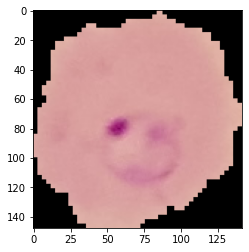

In [22]:
plt.imshow(imread(parasitized_cell))

In [23]:
os.listdir(train_path+'uninfected')[5]

'C100P61ThinF_IMG_20150918_144104_cell_48.png'

In [24]:
uninfected_cell = train_path + 'uninfected/'+ 'C100P61ThinF_IMG_20150918_144104_cell_48.png'

In [25]:
uninfected_cell

'/content/gdrive/My Drive/project_folder/Detecting-Malaria-using-Blood-Cell-Images/cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_48.png'

In [26]:
uninfected_cell = imread(uninfected_cell)

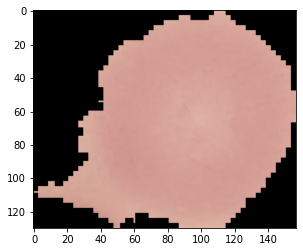

In [27]:
plt.imshow(uninfected_cell)

In [28]:
len(os.listdir(train_path+'parasitized')),len(os.listdir(train_path+'uninfected'))

(12480, 12480)

Number of images of parasitized cell is same as number of images of uninfected_cell

In [29]:
len(os.listdir(test_path+'parasitized')),len(os.listdir(test_path+'parasitized'))

(1300, 1300)

These are real images. So, they don't have same dimensions.

In [30]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path + 'uninfected/' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [31]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


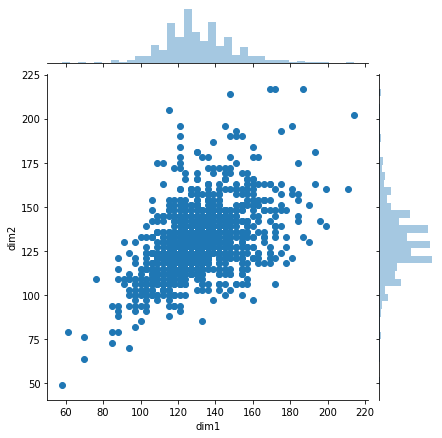

In [37]:
ax=sns.jointplot(dim1,dim2)

ax.set_axis_labels('dim1', 'dim2')

CNN cannot train on different sized images. So, we need to reshape themm


In [38]:
np.mean(dim1)

130.92538461538462

In [39]:
np.mean(dim2)

130.75

In [40]:
# all the images are resized to image_shape
image_shape = (130,130,3)

##Preparing train and test Image Generator

In [41]:
image_gen = ImageDataGenerator(rotation_range=20,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/255,
                              shear_range=0.1,
                              zoom_range=0.1,
                              horizontal_flip = True,
                              fill_mode ='nearest' 
                              )

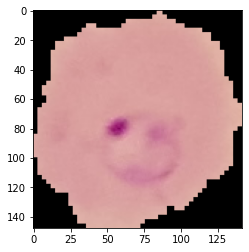

In [42]:
parasitized_cell_img = imread(parasitized_cell)
plt.imshow(parasitized_cell_img)

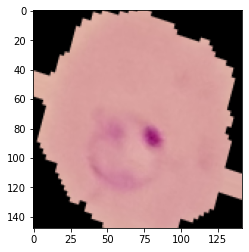

In [43]:
plt.imshow(image_gen.random_transform(parasitized_cell_img))

In [44]:
#Generating more images

image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [45]:
batch_size = 16

In [46]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode='binary'
                                               )

Found 24958 images belonging to 2 classes.


In [47]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                                color_mode = 'rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle= False
                                               )

Found 2600 images belonging to 2 classes.


##Creating the Model

In [48]:
model = Sequential()

model.add(Conv2D(filters=16, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters=32, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=64, 
                 kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation='relu'
                ))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        1

In [50]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [51]:
results = model.fit_generator(train_image_gen, epochs=20,
                              validation_data = test_image_gen,
                              callbacks = [early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1560/1560 [==============================] - 546s 350ms/step - loss: 0.4883 - accuracy: 0.7752 - val_loss: 0.2454 - val_accuracy: 0.9138
Epoch 2/20
1560/1560 [==============================] - 525s 336ms/step - loss: 0.2046 - accuracy: 0.9355 - val_loss: 0.1810 - val_accuracy: 0.9446
Epoch 3/20
1560/1560 [==============================] - 529s 339ms/step - loss: 0.1904 - accuracy: 0.9409 - val_loss: 0.1957 - val_accuracy: 0.9346
Epoch 4/20
1560/1560 [==============================] - 533s 341ms/step - loss: 0.1806 - accuracy: 0.9447 - val_loss: 0.1813 - val_accuracy: 0.9358


In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 62, 62, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        1

In [58]:
# Saved model
model.save("my_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: my_model/assets


In [63]:
model_1 = keras.models.load_model("my_model")

In [64]:
pred= model_1.predict_generator(test_image_gen)

Instructions for updating:
Please use Model.predict, which supports generators.


In [65]:
pred

array([[2.3969710e-03],
       [4.4097496e-06],
       [1.9374664e-05],
       ...,
       [9.8575151e-01],
       [9.8646170e-01],
       [9.7306603e-01]], dtype=float32)

In [66]:
predictions = pred > 0.7

In [70]:
len(predictions)

2600

In [68]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94      1300
           1       0.93      0.96      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



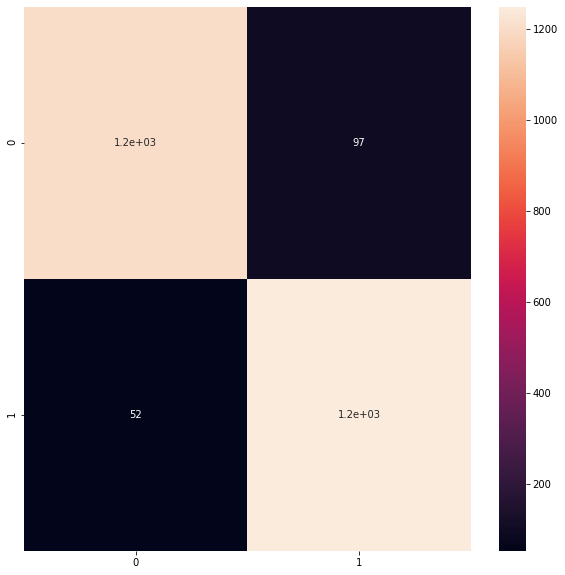

In [71]:
# get the confusion matrix
cm = confusion_matrix(test_image_gen.classes, predictions)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True)